In [2]:
import pandas as pd
chomage = pd.read_csv("donnees/unrate.csv")
chomage.head()

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [3]:
chomage.shape

(841, 2)

In [5]:
#verifie la manquante des données 
print("affiche des nombre de donnees manquantes")
chomage.isnull().sum()

affiche des nombre de donnees manquantes


DATE      0
UNRATE    0
dtype: int64

In [57]:
#Introduction•Lire 'unrate.csv' dans un dataframe et assigner ce résultat à la variable unrate.•Utiliser la fonction pandas.to_datetime() pour convertir la colonne 'DATE' en valeurs datetime.
import datetime as dt
pd.to_datetime(chomage['DATE'])


0     1948-01-01
1     1948-02-01
2     1948-03-01
3     1948-04-01
4     1948-05-01
         ...    
836   2017-09-01
837   2017-10-01
838   2017-11-01
839   2017-12-01
840   2018-01-01
Name: DATE, Length: 841, dtype: datetime64[ns]

In [37]:
#Introduction•Lire 'unrate.csv' dans un dataframe et assigner ce résultat à la variable unrate.•Utiliser la fonction pandas.to_datetime() pour convertir la colonne 'DATE' en valeurs datetime.•Afficher les 12 premières valeurs de unratecorrespondant à une année entière.
print("12 valeurs de unrate correspondant à une année")
#chomage.head(12)
a1948 =chomage.loc[(chomage['DATE'] > '1948-01-01') & (chomage['DATE'] <= '1948-12-31')]
a1948

12 valeurs de unrate correspondant à une année


,DATE,UNRATE
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
5,1948-06-01,3.6
6,1948-07-01,3.6
7,1948-08-01,3.9
8,1948-09-01,3.8
9,1948-10-01,3.7
10,1948-11-01,3.8


In [66]:
from datetime import datetime as dt
#utilise pkg datetime dans datetime
#fonc strptime("string_date", "str_format" ) ex: "%Y-%m-%d" :  can read strings with date and time information and convert them to datetime objects
#fonc strftime : converts datetime objects back into strings.
# applique methode strptime s/chaque valeur du  col 'DATE', suite extrait mois, et est affecté dans nv col 'MONTH'
chomage['MONTH'] = chomage['DATE'].apply(lambda m : dt.strptime(m, "%Y-%m-%d").month)

chomage.head()

,DATE,UNRATE,MONTH
0,1948-01-01,3.4,1
1,1948-02-01,3.8,2
2,1948-03-01,4.0,3
3,1948-04-01,3.9,4
4,1948-05-01,3.5,5


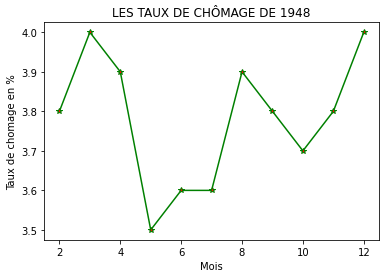

In [67]:
import matplotlib.pyplot as plt
#use fonc figure() mermet de creer une nouvelle figure; vierge
anne1948 = chomage.loc[(chomage['DATE'] > '1948-01-01') & (chomage['DATE'] <= '1948-12-31')]
plt.figure()
# cmd subplot(111) permet de creer un grill de 1*1 puis placer le graphique à la ps 1
plt.subplot(111)
plt.plot(anne1948["MONTH"], anne1948["UNRATE"], marker="*", color='green', markerfacecolor="red")
plt.title("Les taux de chômage de 1948".upper())
plt.xlabel("Mois")
plt.ylabel("Taux de chomage en %")
plt.show()



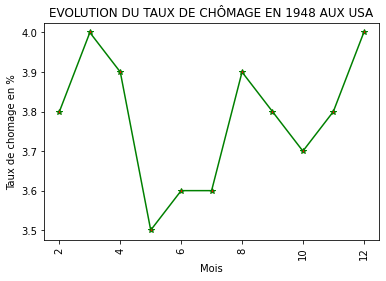

In [68]:
# Utiliser la fonction pyplot.xticks() pour créer une rorationde 90
import matplotlib.pyplot as plt

anne1948 = chomage.loc[(chomage['DATE'] > '1948-01-01') & (chomage['DATE'] <= '1948-12-31')]
plt.figure()
plt.subplot()
plt.plot(anne1948["MONTH"], anne1948["UNRATE"], marker="*", color='green', markerfacecolor="red")
plt.title("Evolution du taux de chômage en 1948 aux USA".upper())
plt.xlabel("Mois")
plt.ylabel("Taux de chomage en %")
plt.xticks(rotation='vertical') #rotation 90°
plt.show()

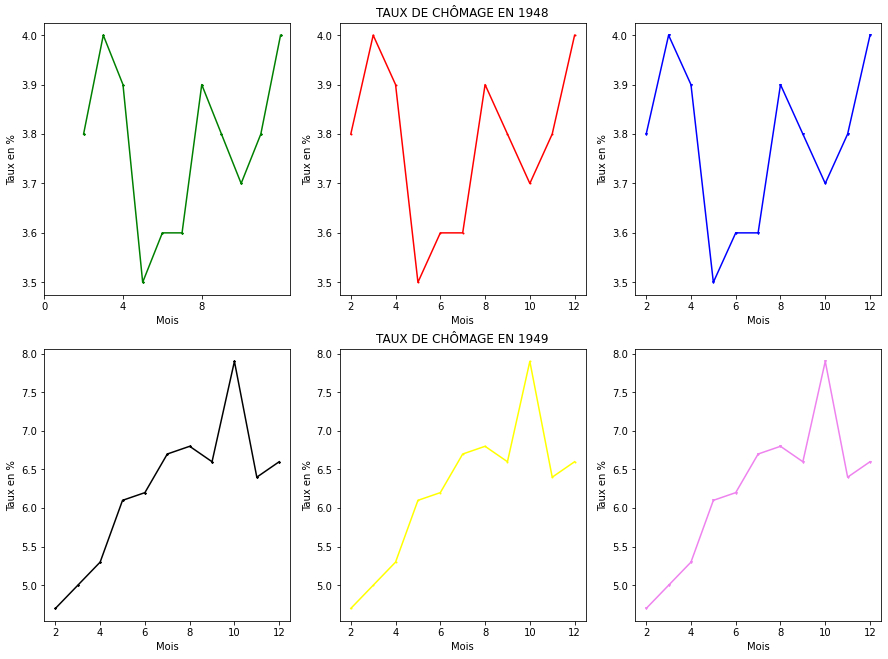

In [80]:
import matplotlib.pyplot as plt
import numpy as np

#creer 6 grap vide s/2 ligne et 3 col
fig, axs = plt.subplots(2, 3, figsize=(15,11))
an1948 =chomage.loc[(chomage['DATE'] > '1948-01-01') & (chomage['DATE'] <= '1948-12-31')]
an1949 =chomage.loc[(chomage['DATE'] > '1949-01-01') & (chomage['DATE'] <= '1949-12-31')]

#generer list sticks de 0 - 12, step 4
xtisks = np.arange(0,12,4)
#AXE 1
axs[0,0].plot(an1948["MONTH"], an1948["UNRATE"], marker="*", color='green', markersize=2)
axs[0,0].set_xlabel("Mois")
axs[0,0].set_xticks(xtisks) #creer stisk axe x av list xticks généré par arange
axs[0,0].set_ylabel("Taux en %")

axs[0,1].plot(an1948["MONTH"], an1948["UNRATE"], marker=".", color='red', markersize=2)
axs[0,1].set_title("Taux de chômage en 1948".upper())
axs[0,1].set_xlabel("Mois")
axs[0,1].set_ylabel("Taux en %")

axs[0,2].plot(an1948["MONTH"], an1948["UNRATE"], marker="v", color='blue', markersize=2)
axs[0,2].set_xlabel("Mois")
axs[0,2].set_ylabel("Taux en %")

axs[1,0].plot(an1949["MONTH"], an1949["UNRATE"], marker="*", color='black', markersize=2)
axs[1,0].set_xlabel("Mois")
axs[1,0].set_ylabel("Taux en %")

#AXE2
axs[1,1].plot(an1949["MONTH"], an1949["UNRATE"], marker=".", color='yellow', markersize=2)
axs[1,1].set_title("Taux de chômage en 1949".upper())
axs[1,1].set_xlabel("Mois")
axs[1,1].set_ylabel("Taux en %")

axs[1,2].plot(an1949["MONTH"], an1949["UNRATE"], marker="v", color='violet', markersize=2)
axs[1,2].set_xlabel("Mois")
axs[1,2].set_ylabel("Taux en %")
plt.show()

# 8. Superposition de courbes

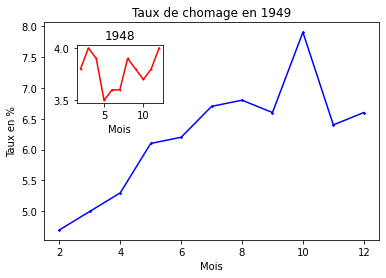

In [101]:
import matplotlib.pyplot as plt
fig, axe_main = plt.subplots()
#axe_principal
axe_main.plot(an1949["MONTH"], an1949["UNRATE"], marker="*", color='blue', markersize=2)
axe_main.set_title("Taux de chomage en 1949")
axe_main.set_xlabel("Mois")
axe_main.set_ylabel("Taux en %")

#axe_superposition
#ajout axe superposition
axe_inscrute = fig.add_axes([0.2, 0.6 , .2, .2])
axe_inscrute.plot(an1948["MONTH"], an1948["UNRATE"], marker=".", color='red', markersize=2)
axe_inscrute.set_title("en 1948")
axe_inscrute.set_xlabel("Mois")
#axe_inscrute.set_ylabel("Taux en %")
plt.show()

# 9. Ajouter plus de courbes

In [135]:
from datetime import datetime
chomage['YEAR'] = chomage['DATE'].apply(lambda d : dt.strptime(d,"%Y-%m-%d").year)
anne4852 = chomage.loc[(chomage['YEAR']>=1948) & (chomage['YEAR']<=1952),['YEAR','UNRATE']]
anne4852['YEAR'].value_counts()

1948    12
1949    12
1950    12
1951    12
1952    12
Name: YEAR, dtype: int64

y <class 'numpy.int64'>
    YEAR  UNRATE
0   1948     3.4
1   1948     3.8
2   1948     4.0
3   1948     3.9
4   1948     3.5
5   1948     3.6
6   1948     3.6
7   1948     3.9
8   1948     3.8
9   1948     3.7
10  1948     3.8
11  1948     4.0
y <class 'numpy.int64'>
    YEAR  UNRATE
12  1949     4.3
13  1949     4.7
14  1949     5.0
15  1949     5.3
16  1949     6.1
17  1949     6.2
18  1949     6.7
19  1949     6.8
20  1949     6.6
21  1949     7.9
22  1949     6.4
23  1949     6.6
y <class 'numpy.int64'>
    YEAR  UNRATE
24  1950     6.5
25  1950     6.4
26  1950     6.3
27  1950     5.8
28  1950     5.5
29  1950     5.4
30  1950     5.0
31  1950     4.5
32  1950     4.4
33  1950     4.2
34  1950     4.2
35  1950     4.3
y <class 'numpy.int64'>
    YEAR  UNRATE
36  1951     3.7
37  1951     3.4
38  1951     3.4
39  1951     3.1
40  1951     3.0
41  1951     3.2
42  1951     3.1
43  1951     3.1
44  1951     3.3
45  1951     3.5
46  1951     3.5
47  1951     3.1
y <class 'numpy.int6

<ipython-input-159-baccf1be5a6f>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(111)
<ipython-input-159-baccf1be5a6f>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(111)
<ipython-input-159-baccf1be5a6f>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and return

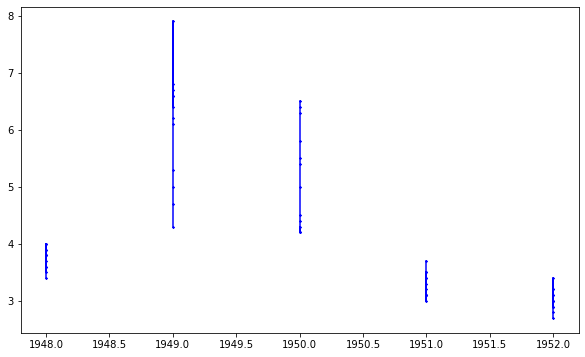

In [159]:
import matplotlib.pyplot as plt

#creer un figure, avec figsize[10,6]
plt.figure(figsize=[10,6])

l_year = anne4852['YEAR'].unique()
l_color = []
for y in l_year :
    plt.subplot(111)
    print("y",type(y))
    masm = anne4852['YEAR']==y
    tmp = anne4852[masm]
    print(tmp)
    plt.plot(tmp['YEAR'], tmp['UNRATE'],marker="*", color='blue', markersize=2)
   # plt.xlabel("Mois")
# plt.ylabel("Taux en %")
plt.show()

array([1948, 1949, 1950, 1951, 1952])